In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.utils import plot_model

# DATASET
**While training of autoencoders for anomaly detection only needs normal data, we collected anomalous data for further uses ( estimating KDE and RE )**
**Normal data was obtained by extracting frames from a 2minutes video of students in a class where chating didn't have place**

In [15]:
train_dir = '../DATASET/Normal_training/'
validation_dir = '../DATASET/Normal_validation/'
anomaly_dir = '../DATASET/Anomaly/'

# Define batch size
batch_size = 64
SIZE = 128

# Function to load and preprocess images from a directory
def load_images_from_directory(directory):
    images = []
    for filename in os.listdir(directory):
        try:
            img_path = os.path.join(directory, filename)
            img = load_img(img_path, target_size=(SIZE, SIZE))
            img_array = img_to_array(img) / 255.0  # Rescale to [0, 1]
            images.append(img_array)
        except Exception as e:
            print(f"Error loading image {filename}: {e}")
    return np.array(images)

# Load and preprocess training, validation, and anomaly images
train_generator = load_images_from_directory(train_dir)
validation_generator = load_images_from_directory(validation_dir)
anomaly_generator = load_images_from_directory(anomaly_dir)

Error loading image .DS_Store: cannot identify image file <_io.BytesIO object at 0x7f7cbb3f9f80>
Error loading image IMG_0547.HEIC: cannot identify image file <_io.BytesIO object at 0x7f7cbb3ece50>
Error loading image .DS_Store: cannot identify image file <_io.BytesIO object at 0x7f7cbb0a2160>
Error loading image ano15.HEIC: cannot identify image file <_io.BytesIO object at 0x7f7cbb45dc10>
Error loading image IMG_0535.HEIC: cannot identify image file <_io.BytesIO object at 0x7f7cbb0a2160>
Error loading image ANo7.HEIC: cannot identify image file <_io.BytesIO object at 0x7f7cbb3c2ac0>
Error loading image ano14.HEIC: cannot identify image file <_io.BytesIO object at 0x7f7cbaf55170>
Error loading image ano18.HEIC: cannot identify image file <_io.BytesIO object at 0x7f7cbb3c2ac0>
Error loading image .DS_Store: cannot identify image file <_io.BytesIO object at 0x7f7cbaf55170>
Error loading image ano19.HEIC: cannot identify image file <_io.BytesIO object at 0x7f7cbb3c2ac0>
Error loading imag

In [5]:
batch_size = 64
SIZE = 128

# AUTOENCODER Architecture

In [6]:
#Encoder
model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

#Decoder
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)      

In [10]:
plot_model(model, to_file='AE.png', show_shapes=True, show_layer_names=True, dpi=66)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Training the AUTOENCODER

In [5]:
#Fit the model. 
history = model.fit(
    train_generator,
    train_generator,
    batch_size=batch_size,
    epochs=100,
    validation_data=(validation_generator, validation_generator),
    shuffle=True
)

Epoch 1/500
54/54 [==============================] - 469s 9s/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 2/500
54/54 [==============================] - 486s 9s/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 3/500
54/54 [==============================] - 476s 9s/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 4/500
54/54 [==============================] - 455s 8s/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 5/500
54/54 [==============================] - 456s 8s/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 6/500
54/54 [==============================] - 444s 8s/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 7/500
54/54 [==============================] - 452s 8s/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 8/500
54/54 [==============================] - 443s 8s/step - loss: 0.

KeyboardInterrupt: 

In [11]:
import numpy as np

# Assuming train_images is your array of training images
num_batches = 5  # Choose the number of batches to retrieve for testing

data_batch = []
for i in range(num_batches):
    batch_start = i * batch_size
    batch_end = (i + 1) * batch_size
    batch = train_generator[batch_start:batch_end]
    data_batch.append(batch)

# Concatenate the list of batches into a single numpy array
data_batch = np.concatenate(data_batch)

# Predict on the entire batch of images
predicted = model.predict(data_batch)

10/10 [==============================] - 11s 1s/step


## Examination of RE (validation & anomaly)

In [12]:
#Let us examine the reconstruction error between our validation data (good/normal images)
# and the anomaly images
validation_error = model.evaluate(validation_generator, validation_generator, verbose=0)
anomaly_error = model.evaluate(anomaly_generator, anomaly_generator, verbose=0)

print("Recon. error for the validation (normal) data is: ", validation_error)
print("Recon. error for the anomaly data is: ", anomaly_error)

Recon. error for the validation (normal) data is:  [0.07088872045278549, 0.07088872045278549]
Recon. error for the anomaly data is:  [0.0608137771487236, 0.0608137771487236]


# Extraction of the trained encoder (weights transfer)
**purpose**: obtaining the latent representation to estimate KDE

In [13]:
#Let us extract (or build) the encoder network, with trained weights.
#This is used to get the compressed output (latent space) of the input image. 
#The compressed output is then used to calculate the KDE

encoder_model = Sequential()
encoder_model.add(Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3), weights=model.layers[0].get_weights()) )
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', weights=model.layers[2].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', weights=model.layers[4].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(16, (3, 3), activation='relu', padding='same', weights=model.layers[6].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)      

In [14]:
# Calculate KDE using sklearn
from sklearn.neighbors import KernelDensity

#Get encoded output of input images = Latent space
encoded_images = encoder_model.predict_generator(train_generator)

# Flatten the encoder output because KDE from sklearn takes 1D vectors as input
encoder_output_shape = encoder_model.output_shape #Here, we have 16x16x16
out_vector_shape = encoder_output_shape[1]*encoder_output_shape[2]*encoder_output_shape[3]

encoded_images_vector = [np.reshape(img, (out_vector_shape)) for img in encoded_images]

#Fit KDE to the image latent data
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(encoded_images_vector)

/var/folders/f7/b7cb937d13v1w87kr83s6x080000gp/T/ipykernel_84904/87809947.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  encoded_images = encoder_model.predict_generator(train_generator)


# KDE & RE

In [15]:
#Calculate density and reconstruction error to find their means values for
#good and anomaly images. 
#We use these mean and sigma to set thresholds. 
def calc_density_and_recon_error(batch_images):
    
    density_list=[]
    recon_error_list=[]
    for im in range(0, batch_images.shape[0]-1):
        
        img  = batch_images[im]
        img = img[np.newaxis, :,:,:]
        encoded_img = encoder_model.predict([[img]]) # Create a compressed version of the image using the encoder
        encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img] # Flatten the compressed image
        density = kde.score_samples(encoded_img)[0] # get a density score for the new image
        reconstruction = model.predict([[img]])
        reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]
        density_list.append(density)
        recon_error_list.append(reconstruction_error)
        
    average_density = np.mean(np.array(density_list))  
    stdev_density = np.std(np.array(density_list)) 
    
    average_recon_error = np.mean(np.array(recon_error_list))  
    stdev_recon_error = np.std(np.array(recon_error_list)) 
    
    return average_density, stdev_density, average_recon_error, stdev_recon_error

In [11]:
#Get average and std dev. of density and recon. error for normal and anomaly images. 
#For this let us generate a batch of images for each. 
train_batch = train_generator[:batch_size]
anomaly_batch = anomaly_generator[:batch_size]

train_density, _ , train_recon_error, _ = calc_density_and_recon_error(train_batch)
anomaly_density, _ , anomaly_recon_error, _ = calc_density_and_recon_error(anomaly_batch)

NameError: name 'train_generator' is not defined

## Observation of the KDE & RE

In [19]:
# Calculate average and standard deviation for normal (training) data
min_train_density = np.min(train_density)
avg_train_density = np.mean(train_density)
max_train_density = np.max(train_density)
std_train_density = np.std(train_density)
avg_train_recon_error = np.mean(train_recon_error)
std_train_recon_error = np.std(train_recon_error)

# Calculate average and standard deviation for anomaly data
min_anomaly_density = np.min(anomaly_density)
avg_anomaly_density = np.mean(anomaly_density)
max_anomaly_density = np.max(anomaly_density)
std_anomaly_density = np.std(anomaly_density)
avg_anomaly_recon_error = np.mean(anomaly_recon_error)
std_anomaly_recon_error = np.std(anomaly_recon_error)

# Print or use the computed statistics as needed
print("Min Density (Normal):", min_train_density)
print("Average Density (Normal):", avg_train_density)
print("Max Density (Normal):", max_train_density)

print("Std Dev Density (Normal):", std_train_density)
print("Average Recon. Error (Normal):", avg_train_recon_error)
print("Std Dev Recon. Error (Normal):", std_train_recon_error)

print("\Min Density (Anomaly):", min_anomaly_density)
print("Average Density (Anomaly):", avg_anomaly_density)
print("Max Density (Anomaly):", max_anomaly_density)
print("Std Dev Density (Anomaly):", std_anomaly_density)
print("Average Recon. Error (Anomaly):", avg_anomaly_recon_error)
print("Std Dev Recon. Error (Anomaly):", std_anomaly_recon_error)

Average Density (Normal): 706.6352469375005
Std Dev Density (Normal): 0.0
Average Recon. Error (Normal): 0.07094104990126594
Std Dev Recon. Error (Normal): 0.0

Average Density (Anomaly): 700.2652372333317
Std Dev Density (Anomaly): 0.0
Average Recon. Error (Anomaly): 0.06076723017862865
Std Dev Recon. Error (Anomaly): 0.0


## Threshold setting based on the above observation

In [41]:
#Now, input unknown images and sort as Good or Anomaly
def check_anomaly(encoder_model,img_path):
    density_threshold = 700 #Set this value based on the above exercise
    reconstruction_error_threshold = 0.1 # Set this value based on the above exercise
    img  = Image.open(img_path)
    saved_image = img
    img = np.array(img.resize((128,128), Image.ANTIALIAS))
    img = img / 255.
    img = img[np.newaxis, :,:,:]
    encoded_img = encoder_model.predict([[img]])
    encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img] 
    density = kde.score_samples(encoded_img)[0] 

    reconstruction = model.predict([[img]])
    reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]

    if density < density_threshold or reconstruction_error > reconstruction_error_threshold:
        plt.imshow(saved_image)
        print("The image is an anomaly")
        
    else:
        plt.imshow(saved_image)
        print("The image is NOT an anomaly")

# Testing

1/1 [==============================] - 0s 45ms/step


/var/folders/f7/b7cb937d13v1w87kr83s6x080000gp/T/ipykernel_84904/513763330.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


1/1 [==============================] - 0s 56ms/step - loss: 0.0590 - mse: 0.0590
The image is an anomaly


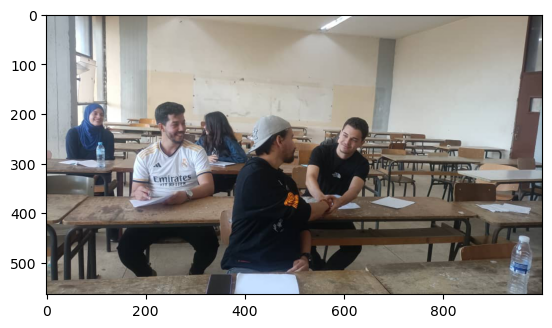

In [37]:
#Load a couple of test images and verify whether they are reported as anomalies.
import glob
anomaly_file_path = glob.glob('DATASET/Anomaly/*')
normal_file_path = glob.glob('DATASET/Normal_training/*')

#Anomaly image verification
num=random.randint(0,len(anomaly_file_path)-1)
check_anomaly(anomaly_file_path[num])

1/1 [==============================] - 0s 39ms/step


/var/folders/f7/b7cb937d13v1w87kr83s6x080000gp/T/ipykernel_84904/513763330.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


1/1 [==============================] - 0s 51ms/step - loss: 0.0724 - mse: 0.0724
The image is NOT an anomaly


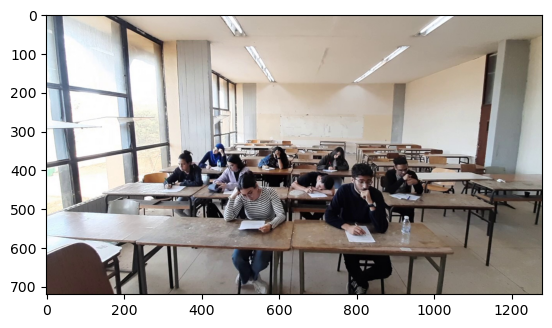

In [38]:
#Good/normal image verification
num=random.randint(0,len(normal_file_path)-1)
check_anomaly(normal_file_path[num])

In [39]:
model.save('completeAE.h5')

In [40]:
encoder_model.save('encoderJust.h5')

In [43]:
import keras
loaded_encoder = keras.models.load_model("encoderJust.h5")

1/1 [==============================] - 0s 39ms/step


/var/folders/f7/b7cb937d13v1w87kr83s6x080000gp/T/ipykernel_84904/2114976021.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


1/1 [==============================] - 0s 52ms/step - loss: 0.0705 - mse: 0.0705
The image is NOT an anomaly


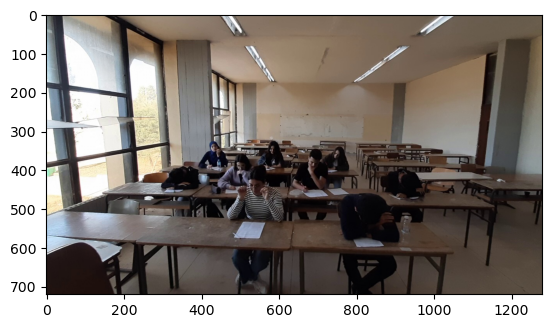

In [46]:
num=random.randint(0,len(anomaly_file_path)-1)
check_anomaly(loaded_encoder,normal_file_path[num])